In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import tree
#Load dataset
iris = datasets.load_iris()

In [2]:
# print the names of the 13 features

print(iris.feature_names)
# print the label type of wine(class_0, class_1, class_2)

print(iris.target_names)

# print data(feature)shape
print(iris.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


In [4]:
#import the necessary module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(iris.data,iris.target,test_size=0.3,random_state=147)


In [5]:
from sklearn.tree import DecisionTreeClassifier
#Create a Decision Tree Classifier (using Gini)
#Train the model using the training sets


clf = DecisionTreeClassifier(random_state=147)
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=147, splitter='best')

In [6]:
from sklearn.metrics import classification_report
# Predict the classes of test data
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.77      0.87        13
           2       0.85      1.00      0.92        17

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



[Text(133.92000000000002, 190.26, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [35, 37, 33]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 1.65\ngini = 0.498\nsamples = 70\nvalue = [0, 37, 33]'),
 Text(133.92000000000002, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

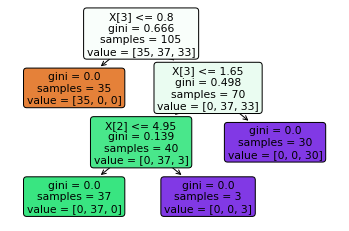

In [7]:
from sklearn.tree import plot_tree


plot_tree(clf,filled=True,rounded=True)

Exercise:

6) 126<=Rollnumber + All with No RollNumbers:

#Task 1: Try the algo on Same Whether dataset - LabelEncoding of features:and Train test Division 95%-5%

#Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%

Instruction for Task-1 & 2:

i) Set Random state and maximum allowed leaf of model equals to your roll number (or last 2 digit of your id -if you don't have roll number)

Questions: For Task - 1

(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

(3) Accuracy , precision and recall of both Models?

Task 1:

In [8]:
from sklearn import preprocessing

In [9]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [10]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)


Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}


In [11]:
X = np.vstack((Wind_encoded,Temperature_encoded,Humidity_encoded,Outlook_encoded)).T
Data = pd.DataFrame(data=X,columns=["wind","temp","humidity","outlook"])
Labels = pd.Series(data=Play_encoded,name="play")

In [12]:
W_train, W_test, W_y_train, W_y_test =train_test_split(Data,Labels,test_size=0.3,random_state=147)

In [13]:
W_model = DecisionTreeClassifier(random_state=147,max_leaf_nodes=147)
W_model.fit(W_train,W_y_train)
W_y_pred = W_model.predict(W_test)

In [14]:
print(classification_report(W_y_test,W_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [15]:
W_model.predict([[1,2,1,0],[2,0,0,1]])


array([1, 0])

Task 2:

In [16]:
wineData = datasets.load_wine()

In [17]:
print(wineData.feature_names)
print(wineData.data.shape)
print(wineData.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
['class_0' 'class_1' 'class_2']


In [18]:
Wine_train, Wine_test, Wine_y_train, Wine_y_test =train_test_split(wineData.data,wineData.target,test_size=0.34,random_state=147)

In [19]:
wine_model = DecisionTreeClassifier(random_state=147,max_leaf_nodes=147)
wine_model.fit(Wine_train,Wine_y_train)
Wine_y_pred = wine_model.predict(Wine_test)

In [20]:
print(classification_report(Wine_y_test,Wine_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.73      0.83        26
           2       0.70      0.94      0.80        17

    accuracy                           0.85        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.88      0.85      0.85        61



[Text(125.55000000000001, 190.26, 'X[11] <= 2.115\ngini = 0.659\nsamples = 117\nvalue = [41, 45, 31]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(167.4, 135.9, 'X[12] <= 726.5\ngini = 0.51\nsamples = 87\nvalue = [41, 45, 1]'),
 Text(83.7, 81.53999999999999, 'X[6] <= 0.925\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[9] <= 3.49\ngini = 0.162\nsamples = 45\nvalue = [41, 4, 0]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

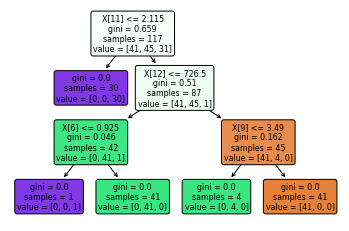

In [21]:
plot_tree(wine_model,filled=True,rounded=True)
# dotfile = open("./winetree.dot", 'w')
# tree.export_graphviz(wine_model, out_file = dotfile, feature_names = wineData.feature_names)
# dotfile.close()